In [2]:
# Connecting Google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Reading the data set as data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Income_Cluster_Data.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


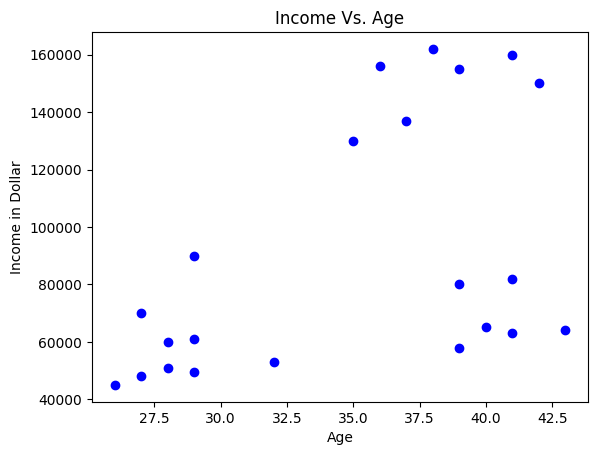

In [7]:
# Observe any inherited pattern in income w.r.t age
plt.scatter(data['Age'], data['Income($)'], color = 'blue', marker = 'o')
plt.xlabel('Age')
plt.ylabel('Income in Dollar')
plt.title('Income Vs. Age')
plt.show()

# So, visually there are three clusters in the data

In [10]:
# Define the model object
model = KMeans(n_clusters = 3)

In [12]:
# Train the model with the 'Age' and 'Income' column
model.fit(data[['Age', 'Income($)']])

KMeans(n_clusters=3)

In [14]:
# Predict the model outcomes as y_pred
y_pred = model.predict(data[['Age', 'Income($)']])
y_pred

# So, it is clear that there are three clusters - cluster-0, cluster-1 and cluster-2

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [15]:
# Create another column 'cluster' in data wih y_pred
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [16]:
# Separate three clusters ino three different data frames
df0 = data[data['cluster'] == 0]
df1 = data[data['cluster'] == 1]
df2 = data[data['cluster'] == 2]

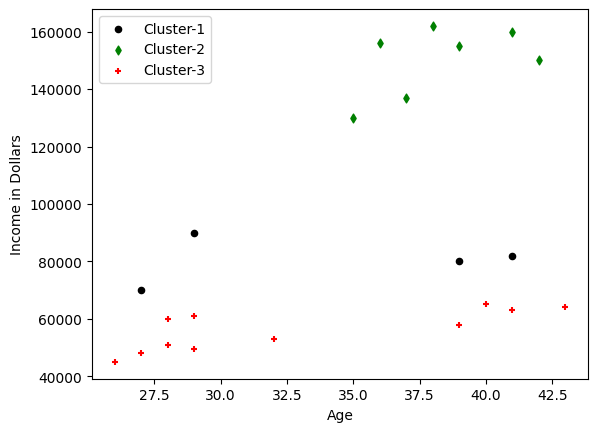

In [23]:
# Plot the 'Age' with income for three different data frames
plt.scatter(df0['Age'], df0['Income($)'], color = 'black', marker = 'o', s = 20)
plt.scatter(df1['Age'], df1['Income($)'], color = 'green', marker = 'd', s = 20)
plt.scatter(df2['Age'], df2['Income($)'], color = 'red', marker = '+', s = 20)
plt.xlabel('Age')
plt.ylabel('Income in Dollars')
plt.legend(['Cluster-1', 'Cluster-2', 'Cluster-3'])
plt.show()

# The cluster-1 is not good
# This happens because of the narrow scalling of the X axis values

In [24]:
# Scalling the X xais
scaler = MinMaxScaler()

In [26]:
# Scalling the 'Income($)' and 'Age' column and append it back in the original data frame
data['Income($)'] = scaler.fit_transform(data[['Income($)']])
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [33]:
# Use K-Means algorithm once again on this scalled columns
model_2 = KMeans(n_clusters = 3)

In [34]:
# Train the model using 'Age' and 'Income($)'
model_2.fit(data[['Age', 'Income($)']])

KMeans(n_clusters=3)

In [35]:
# Predict the outcomes of the model
y_pred_2 = model_2.predict(data[['Age', 'Income($)']])
y_pred_2

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [42]:
# Get the cluster centroids
centroids = model_2.cluster_centers_
centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [36]:
# Combining y_pred_2 in the data frame
data['cluster_2'] = y_pred_2
data.head()

,Name,Age,Income($),cluster,cluster_2
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0


In [37]:
# Separating the data frames for three clusters using cluster_2 column
df0 = data[data['cluster_2'] == 0]
df1 = data[data['cluster_2'] == 1]
df2 = data[data['cluster_2'] == 2]

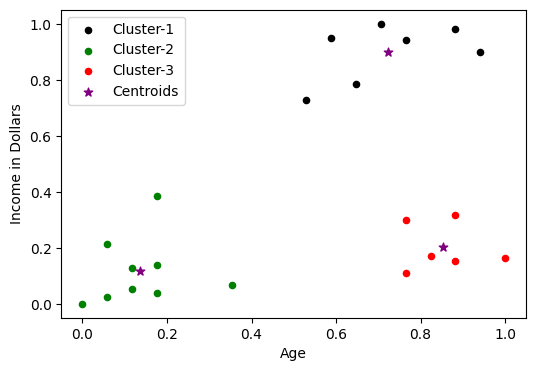

In [46]:
# Plotting the Clusters
plt.figure(figsize = (6,4))
plt.scatter(df0['Age'], df0['Income($)'], color = 'black', s = 20)
plt.scatter(df1['Age'], df1['Income($)'], color = 'green', s = 20)
plt.scatter(df2['Age'], df2['Income($)'], color = 'red', s = 20)
plt.scatter(centroids[:,0], centroids[:,1], color = 'purple', marker = '*', s = 40)
plt.xlabel('Age')
plt.ylabel('Income in Dollars')
plt.legend(['Cluster-1', 'Cluster-2', 'Cluster-3', 'Centroids'])
plt.show()

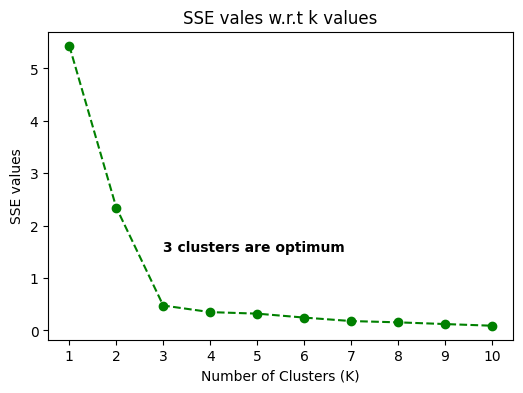

In [51]:
# For k values running from 1 to 10 calculate the SSE and then plot them w.r.t k values
k_rng = range(1,11)
sse = []

for k in k_rng:
  model = KMeans(n_clusters = k)
  model.fit(data[['Age', 'Income($)']])
  sse.append(model.inertia_)

# Plot the SSE values w.r.t k values
plt.figure(figsize = (6,4))
plt.plot(k_rng, sse, color = 'green', linestyle = '--', marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE values')
plt.xticks(range(1, 11, 1))
plt.text(3, 1.5, '3 clusters are optimum', fontsize = 10, fontweight = 'bold')
plt.title('SSE vales w.r.t k values')
plt.show()